In [1304]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [1305]:
url = 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States'
page = requests.get(url)

In [1306]:
page.status_code

200

In [1307]:
soup = BeautifulSoup(page.text,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of presidents of the United States - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-featu

In [1308]:
table = soup.find('table', {'class': 'wikitable'})

# Extract column headers
headers = [header.text.strip().replace('\n', '') for header in table.find_all('th')]
print(table)

<table class="wikitable sortable sticky-header" style="text-align:center;">
<caption><style data-mw-deduplicate="TemplateStyles:r1152813436">.mw-parser-output .sr-only{border:0;clip:rect(0,0,0,0);clip-path:polygon(0px 0px,0px 0px,0px 0px);height:1px;margin:-1px;overflow:hidden;padding:0;position:absolute;width:1px;white-space:nowrap}</style><span class="sr-only">List of presidents of the United States from 1789 – till date.</span>
</caption>
<tbody><tr>
<th scope="col"><abbr title="Number">No.</abbr><sup class="reference" id="cite_ref-14"><a href="#cite_note-14">[a]</a></sup>
</th>
<th class="unsortable" scope="col">Portrait
</th>
<th scope="col">Name<br/><span style="font-size:85%;">(Birth–Death)</span>
</th>
<th class="unsortable" scope="col">Term<sup class="reference" id="cite_ref-FOOTNOTELOCwhitehouse.gov_15-0"><a href="#cite_note-FOOTNOTELOCwhitehouse.gov-15">[14]</a></sup>
</th>
<th colspan="2" scope="col">Party<sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[b]</

In [1309]:
titles = table.find_all('th')
print(titles)

[<th scope="col"><abbr title="Number">No.</abbr><sup class="reference" id="cite_ref-14"><a href="#cite_note-14">[a]</a></sup>
</th>, <th class="unsortable" scope="col">Portrait
</th>, <th scope="col">Name<br/><span style="font-size:85%;">(Birth–Death)</span>
</th>, <th class="unsortable" scope="col">Term<sup class="reference" id="cite_ref-FOOTNOTELOCwhitehouse.gov_15-0"><a href="#cite_note-FOOTNOTELOCwhitehouse.gov-15">[14]</a></sup>
</th>, <th colspan="2" scope="col">Party<sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[b]</a></sup><sup class="reference" id="cite_ref-FOOTNOTE''Guide_to_U.S._Elections''2010257–258_17-0"><a href="#cite_note-FOOTNOTE''Guide_to_U.S._Elections''2010257–258-17">[15]</a></sup>
</th>, <th class="unsortable" scope="col">Election
</th>, <th class="unsortable" scope="col">Vice President<sup class="reference" id="cite_ref-FOOTNOTELOC_18-0"><a href="#cite_note-FOOTNOTELOC-18">[16]</a></sup>
</th>, <th scope="row"><a href="/wiki/Presidency_of_George

In [1310]:
table_titles = [title.text.strip().replace('\n', '').replace('[a]', '').replace('[b]', '').replace('[16]', '').replace('[15]', '').replace('[14]', '') for title in titles]
print(table_titles)

['No.', 'Portrait', 'Name(Birth–Death)', 'Term', 'Party', 'Election', 'Vice President', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46']


In [1311]:
limited_titles = table_titles[:8]
limited_titles

['No.',
 'Portrait',
 'Name(Birth–Death)',
 'Term',
 'Party',
 'Election',
 'Vice President',
 '1']

In [1312]:
presidents_data = pd.DataFrame(columns = limited_titles )
presidents_data

,No.,Portrait,Name(Birth–Death),Term,Party,Election,Vice President,1


In [1313]:
rows = table.find_all('tr')
print(rows)

[<tr>
<th scope="col"><abbr title="Number">No.</abbr><sup class="reference" id="cite_ref-14"><a href="#cite_note-14">[a]</a></sup>
</th>
<th class="unsortable" scope="col">Portrait
</th>
<th scope="col">Name<br/><span style="font-size:85%;">(Birth–Death)</span>
</th>
<th class="unsortable" scope="col">Term<sup class="reference" id="cite_ref-FOOTNOTELOCwhitehouse.gov_15-0"><a href="#cite_note-FOOTNOTELOCwhitehouse.gov-15">[14]</a></sup>
</th>
<th colspan="2" scope="col">Party<sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[b]</a></sup><sup class="reference" id="cite_ref-FOOTNOTE''Guide_to_U.S._Elections''2010257–258_17-0"><a href="#cite_note-FOOTNOTE''Guide_to_U.S._Elections''2010257–258-17">[15]</a></sup>
</th>
<th class="unsortable" scope="col">Election
</th>
<th class="unsortable" scope="col">Vice President<sup class="reference" id="cite_ref-FOOTNOTELOC_18-0"><a href="#cite_note-FOOTNOTELOC-18">[16]</a></sup>
</th></tr>, <tr>
<th scope="row"><a href="/wiki/Presidency_

In [1314]:
data = []
for row in rows[1:]:
    row_data = row.find_all(['th', 'td'])    
    individual_row_data = [data.text.strip().replace('\n\n', ' - ').replace('\n', ' ') for data in row_data][:8]
    data.append(individual_row_data)

president_data = pd.DataFrame(data=data, columns=limited_titles)
# Drop 'Party' and 'No' columns
president_data.drop(columns=['Party', 'No.', 'Portrait'], inplace=True)
# Rename columns as requested
president_data.rename(columns={'Election': 'Party', 'Vice President': 'Election', '1': 'Vice President'}, inplace=True)
president_data.dropna(inplace=True)
president_data

,Name(Birth–Death),Term,Party,Election,Vice President
0,George Washington(1732–1799)[17],"April 30, 1789–March 4, 1797",Unaffiliated,1788–1789 - 1792,John Adams[c]
1,John Adams(1735–1826)[19],"March 4, 1797–March 4, 1801",Federalist,1796,Thomas Jefferson[d]
2,Thomas Jefferson(1743–1826)[21],"March 4, 1801–March 4, 1809",Democratic-Republican,1800 - 1804,Aaron Burr - George Clinton
3,James Madison(1751–1836)[22],"March 4, 1809–March 4, 1817",Democratic-Republican,1808 - 1812,"George Clinton[e] - Vacant afterApril 20, 1812..."
4,James Monroe(1758–1831)[24],"March 4, 1817–March 4, 1825",Democratic-Republican,1816 - 1820,Daniel D. Tompkins
5,John Quincy Adams(1767–1848)[25],"March 4, 1825–March 4, 1829",Democratic-Republican[f] - National Republican,1824,John C. Calhoun[g]
6,Andrew Jackson(1767–1845)[28],"March 4, 1829–March 4, 1837",Democratic,1828 - 1832,"John C. Calhoun[h] - Vacant afterDecember 28, ..."
7,Martin Van Buren(1782–1862)[29],"March 4, 1837–March 4, 1841",Democratic,1836,Richard Mentor Johnson
8,William Henry Harrison(1773–1841)[30],"March 4, 1841–April 4, 1841[e]",Whig,1840,John Tyler
9,John Tyler(1790–1862)[31],"April 4, 1841[i]–March 4, 1845",Whig[j] - Unaffiliated,–,Vacant throughoutpresidency


In [1368]:
df = pd.DataFrame(president_data)
# Split the 'Term' column into 'Start Term' and 'End Term'
df[['Start Term', 'End Term']] = df['Term'].str.split('–', expand=True)

# Drop the original 'Term' column
df.drop(columns=['Term'], inplace=True)

# Reorder columns if necessary
df['Party'] = df['Election']
df['Election'] = df['Vice President']
df['Vice President'] = df['Party']
df = df.drop('Party', axis = 1)
df = df.drop('Election', axis = 1)
df = df.drop('Vice President', axis = 1)
# Print the updated DataFrame
(df)

,Start Term,End Term,Term Duration,Name,Death,Birth
0,"April 30, 1789","March 4, 1797",2865 days,George Washington,1799[17],1732
1,"March 4, 1797","March 4, 1801",1460 days,John Adams,1826[19],1735
2,"March 4, 1801","March 4, 1809",2922 days,Thomas Jefferson,1826[21],1743
3,"March 4, 1809","March 4, 1817",2922 days,James Madison,1836[22],1751
4,"March 4, 1817","March 4, 1825",2922 days,James Monroe,1831[24],1758
5,"March 4, 1825","March 4, 1829",1461 days,John Quincy Adams,1848[25],1767
6,"March 4, 1829","March 4, 1837",2922 days,Andrew Jackson,1845[28],1767
7,"March 4, 1837","March 4, 1841",1461 days,Martin Van Buren,1862[29],1782
8,"March 4, 1841","April 4, 1841[e]",NaT,William Henry Harrison,1841[30],1773
9,"April 4, 1841[i]","March 4, 1845",NaT,John Tyler,1862[31],1790


In [1350]:
#question How many presidents are on the web page? [5]
unique_presidents = president_data['Name(Birth–Death)'].nunique()
print("Number of unique presidents:", unique_presidents)

Number of unique presidents: 45


In [1336]:
#question 3 How many presidencies ever existed in the United states ? [5]
total_presidencies = len(president_data)
print("Total number of presidencies:", total_presidencies)

Total number of presidencies: 46


In [1370]:
#question 4 Which presidents served more than one term and had only one vice president for the whole duration of their presidency? [5]
multiple_term_presidents = president_data[president_data['Term'].str.contains('–', regex=False)]
grouped = multiple_term_presidents.groupby('Name')['Vice President'].nunique()
single_vp_presidents_names = grouped[grouped == 1].index
single_vp_presidents = multiple_term_presidents[multiple_term_presidents['Name'].isin(single_vp_presidents_names)]
presidents_with_single_vp = single_vp_presidents['Name'].unique()
print("Presidents who served more than one term and had only one vice president for the whole duration of their presidency:")
print(presidents_with_single_vp)

Presidents who served more than one term and had only one vice president for the whole duration of their presidency:
['George Washington' 'John Adams' 'Thomas Jefferson' 'James Madison'
 'James Monroe' 'John Quincy Adams' 'Andrew Jackson' 'Martin Van Buren'
 'William Henry Harrison' 'John Tyler' 'James K. Polk' 'Zachary Taylor'
 'Millard Fillmore' 'Franklin Pierce' 'James Buchanan' 'Abraham Lincoln'
 'Andrew Johnson' 'Ulysses S. Grant' 'Rutherford B. Hayes'
 'James A. Garfield' 'Chester A. Arthur' 'Benjamin Harrison'
 'William McKinley' 'Theodore Roosevelt' 'William Howard Taft'
 'Woodrow Wilson' 'Warren G. Harding' 'Calvin Coolidge' 'Herbert Hoover'
 'Franklin D. Roosevelt' 'Harry S. Truman' 'Dwight D. Eisenhower'
 'John F. Kennedy' 'Lyndon B. Johnson' 'Richard Nixon' 'Gerald Ford'
 'Jimmy Carter' 'Ronald Reagan' 'George H. W. Bush' 'Bill Clinton'
 'George W. Bush' 'Barack Obama' 'Donald Trump' 'Joe Biden']


In [1415]:
#question 5 Which president was in office longer than others and when did he get in office? [5]
president_data['Start Term'] = pd.to_datetime(president_data['Term'].str.split('–').str[0], errors='coerce')
president_data['End Term'] = pd.to_datetime(president_data['Term'].str.split('–').str[1].replace('Incumbent', pd.Timestamp.now().strftime('%Y-%m-%d')), errors='coerce')
president_data['Term Duration'] = president_data['End Term'] - president_data['Start Term']
longest_serving_president = president_data.loc[president_data['Term Duration'].idxmax()]
print("President who was in office longer than others and when he got into office:")
print(f"Name: {longest_serving_president['Name']}")
print(f"Start Term: {longest_serving_president['Start Term'].date()}")
print(f"Duration in Office: {longest_serving_president['Term Duration']}")

President who was in office longer than others and when he got into office:
Name: nan
Start Term: 1801-03-04
Duration in Office: 2922 days 00:00:00


In [ ]:
#question 6 Which presidents were elected after serving as vice presidents ? [5]
president_data['Name'] = president_data['Name'].str.extract(r'^(.*?)\(')[0]
vice_presidents = president_data[president_data['Vice President'] != '']['Vice President'].unique()
presidents_who_were_vps = president_data[president_data['Name'].isin(vice_presidents)]['Name'].unique()
print("Presidents who were elected after serving as vice presidents:")
print(presidents_who_were_vps)

In [ ]:
#question 7 How many presidents were never elected, and what are their names? [5]
elected_presidents = president_data[president_data['Election'] != '']['Name'].unique()
non_elected_presidents = president_data[~president_data['Name'].isin(elected_presidents)]['Name'].unique()
print("Number of presidents who were never elected:", len(non_elected_presidents))
print("Names of presidents who were never elected:")
print(non_elected_presidents)

In [1394]:
#question 8 How many presidents have the same forenames and/or surnames and who are they ? [5]
names = df['Name'].str.split(' ')
first_names = names.apply(lambda x: x[0])
last_names = names.apply(lambda x: x[-1])
common_first_names = first_names[first_names.duplicated(keep=False)].unique()
common_last_names = last_names[last_names.duplicated(keep=False)].unique()
print("Presidents with common forenames:")
print(df[df['Name'].str.split(' ').apply(lambda x: x[0]).isin(common_first_names)]['Name'].unique())
print("Presidents with common surnames:")
print(df[df['Name'].str.split(' ').apply(lambda x: x[-1]).isin(common_last_names)]['Name'].unique())

Presidents with common forenames:
['George Washington' 'John Adams' 'James Madison' 'James Monroe'
 'John Quincy Adams' 'Andrew Jackson' 'William Henry Harrison'
 'John Tyler' 'James K. Polk' 'Franklin Pierce' 'James Buchanan'
 'Andrew Johnson' 'James A. Garfield' 'Grover Cleveland'
 'William McKinley' 'William Howard Taft' 'Franklin D. Roosevelt'
 'John F. Kennedy' 'George H. W. Bush' 'George W. Bush']
Presidents with common surnames:
['John Adams' 'John Quincy Adams' 'William Henry Harrison'
 'Andrew Johnson' 'Grover Cleveland' 'Benjamin Harrison'
 'Theodore Roosevelt' 'Franklin D. Roosevelt' 'Lyndon B. Johnson'
 'George H. W. Bush' 'George W. Bush']


In [1126]:
#president_data['Age at Election'] = (president_data['Election Year'] - president_data['Birth']).dt.days / 365.25
#president_data = president_data[~president_data['Age at Election'].isna()]
#print(president_data)

In [ ]:
#question 9 Who was the oldest president ever elected for office ? [5]
oldest_elected_president = df.loc[president_data['Age at Election'].idxmax()]
print("Oldest president ever elected for office:")
print(f"Name: {oldest_elected_president['Name(Birth–Death)']}")
print(f"Age at Election: {oldest_elected_president['Age at Election']:.2f} years")assignment

In [ ]:
#question 10 Who was the youngest president ever elected for office ? [5]
youngest_elected_president = president_data.loc[president_data['Age at Election'].idxmin()]
print("Youngest president ever elected for office:")
print(f"Name: {youngest_elected_president['Name']}")
print(f"Age at Election: {youngest_elected_president['Age at Election']:.2f} years")

In [ ]:
#question 11 Which president lived up to a very old age, after leaving office ?[5]
['Death'] = pd.to_datetime(president_data['Name(Birth–Death)'].str.extract(r'–(.*)\)')[0], errors='coerce')
president_data['Age at Death'] = (president_data['Death'] - president_data['Birth']).dt.days / 365.25
longest_lived_president = president_data.loc[president_data['Age at Death'].idxmax()]
print("President who lived up to a very old age, after leaving office:")
print(f"Name: {longest_lived_president['Name(Birth–Death)']}")
print(f"Age at Death: {longest_lived_president['Age at Death']} years")

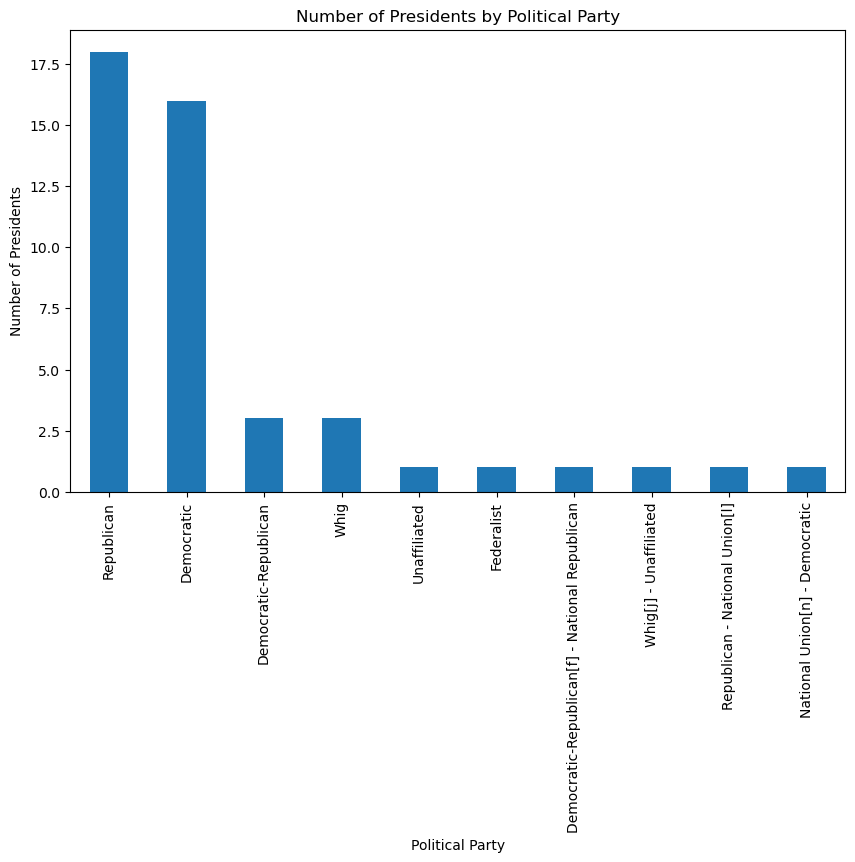

Political party with the most elected presidents:
Republican


In [1412]:
#question 12 Draw a graph that shows the number of presidents and their respective political parties which they came from, and which party have many elected presidents ?[5]
import matplotlib.pyplot as plt

party_counts = president_data['Party'].value_counts()
plt.figure(figsize=(10, 6))
party_counts.plot(kind='bar')
plt.title('Number of Presidents by Political Party')
plt.xlabel('Political Party')
plt.ylabel('Number of Presidents')
plt.show()
print("Political party with the most elected presidents:")
print(party_counts.idxmax())